# Submission By Najeeb Fariduddin Saiyed
## officialnajeebsaiyed@gmail.com
## File - NTM 1
___


## Importing Libraries

In [ ]:
!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from sklearn.model_selection import train_test_split

import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Importing Our Data

In [2]:
df_train = pd.read_csv("/kaggle/input/assgt-dataset-company/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")
df_test = pd.read_csv("/kaggle/input/assgt-dataset-company/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

## Understading Our Data

In [3]:
df_train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
df_train.describe(include='all')

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
count,550176,550176,550176,550176,550176,550176,550176,550176.000000
unique,3,3,45,4,3,2,11,NaN
top,NTM2,X1,A28,DIRECT,Large,Powder,Nov-20,NaN
freq,236726,419857,41925,453617,325566,471593,60446,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.817286
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.390093
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-196.070000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.150000


In [5]:
df_train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

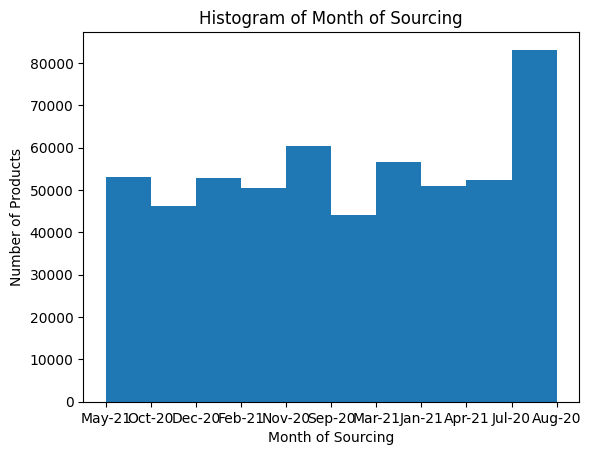

In [6]:
plt.hist(df_train['Month of Sourcing'])
plt.xlabel('Month of Sourcing')
plt.ylabel('Number of Products')
plt.title('Histogram of Month of Sourcing')
plt.show()

The histogram shows a distinct seasonal pattern, with August 2020 being the peak month for sourcing products. The months leading up to August 2020 also exhibit relatively high values, suggesting a gradual build-up towards the peak period

In [7]:
# Group data by product type and calculate descriptive statistics for Sourcing Cost
print(df_train.groupby('Product Type')['Sourcing Cost'].describe())

                 count        mean         std     min    25%     50%     75%  \
Product Type                                                                    
Liquid         78583.0   90.330443   82.895209 -196.07  24.61   66.65  147.26   
Powder        471593.0  111.897806  107.245883  -57.60  64.32  133.30  145.92   

                   max  
Product Type            
Liquid         4167.91  
Powder        32632.50  


In [8]:
unique_product_types_train = df_train['ProductType'].unique()
print("\nUnique Product Types in Training Dataset:", unique_product_types_train)

unique_product_types_test = df_test['ProductType'].unique()
print("Unique Product Types in Test Dataset:", unique_product_types_test)



Unique Product Types in Training Dataset: ['NTM3' 'NTM2' 'NTM1']
Unique Product Types in Test Dataset: ['NTM1' 'NTM2' 'NTM3']


## Displaying graphs for Categorical Variables

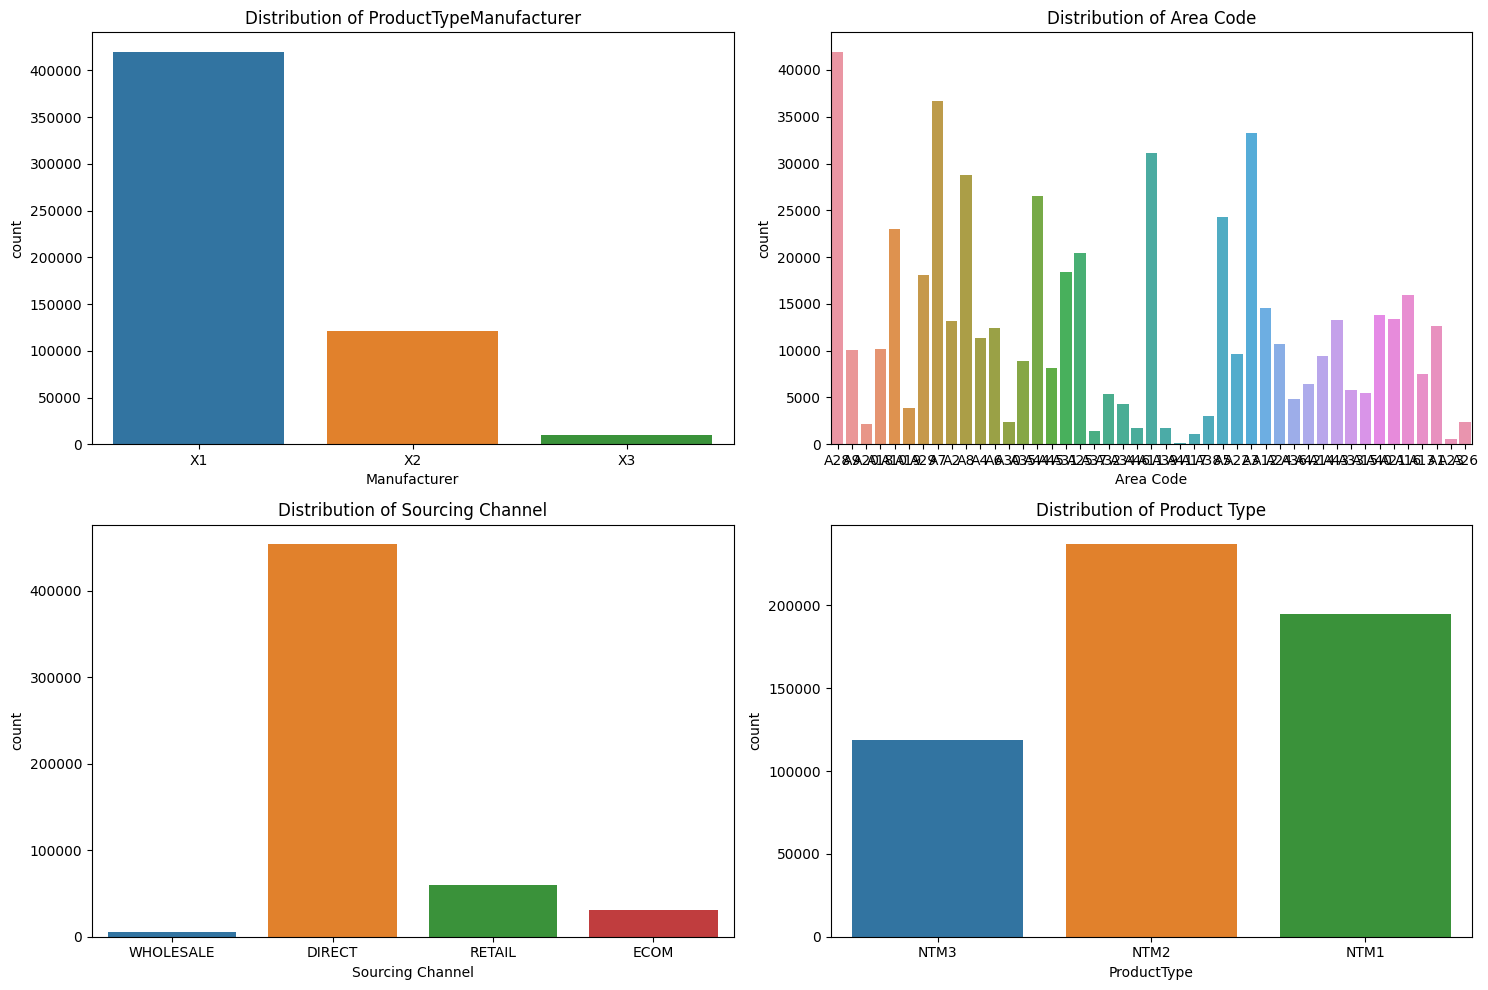

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.countplot(data=df_train, x='Manufacturer', ax=axes[0])
axes[0].set_title('Distribution of ProductTypeManufacturer')

sns.countplot(data=df_train, x='Area Code', ax=axes[1])
axes[1].set_title('Distribution of Area Code')

sns.countplot(data=df_train, x='Sourcing Channel', ax=axes[2])
axes[2].set_title('Distribution of Sourcing Channel')

sns.countplot(data=df_train, x='ProductType', ax=axes[3])
axes[3].set_title('Distribution of Product Type')

plt.tight_layout()
plt.show()

* The top left chart shows the distribution of ProductTypeManufacturer, where X1 has the highest count, followed by X2, while X3 has a relatively small count.
* The top right chart depicts the distribution of Area Code, with a large number of distinct area codes, some having higher counts than others.
* The bottom left chart shows the distribution of Sourcing Channel, with WHOLESALE being the most prominent channel, followed by DIRECT and RETAIL, while ECOM has the lowest count.
* The bottom right chart represents the distribution of Product Type, where NTM2 has the highest count, followed by NTM1, and NTM3 has the lowest count.

## Graphs for Product Size & Sourcing Cost

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


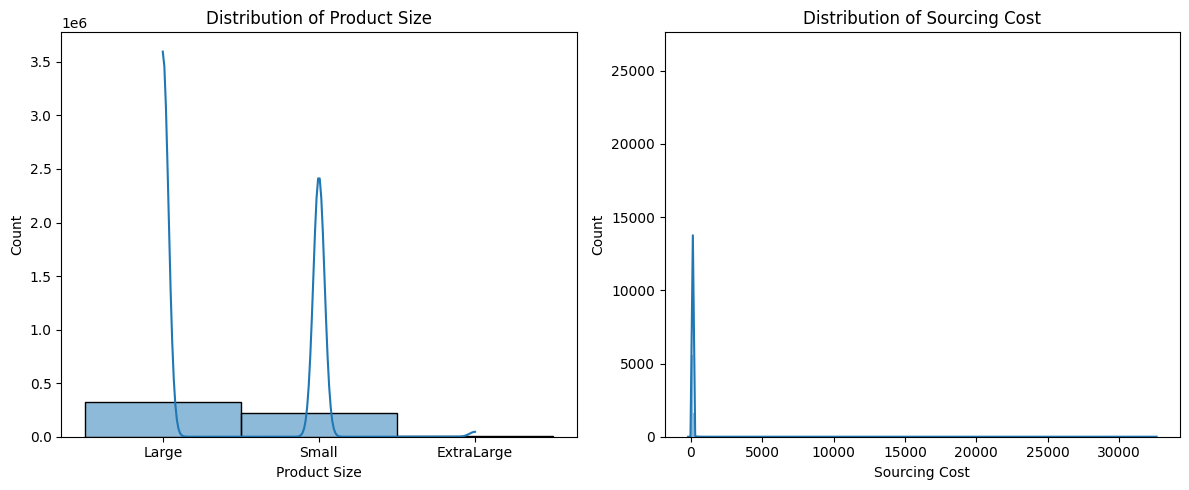

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_train, x='Product Size', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Size')

sns.histplot(data=df_train, x='Sourcing Cost', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Sourcing Cost')

plt.tight_layout()
plt.show()


The chart on the left shows the distribution of Product Size. The majority of products fall under the "Small" size category, followed by "ExtraLarge" and then "Large" as the smallest category.
The chart on the right represents the distribution of Sourcing Cost. It is a histogram showing the frequency or count of products for different ranges of sourcing costs. The data appears to be right-skewed, with most products having lower sourcing costs, while a smaller number of products have higher sourcing costs extending up to around 30,000.

## Product Siz and Sourcing Cost - Relation

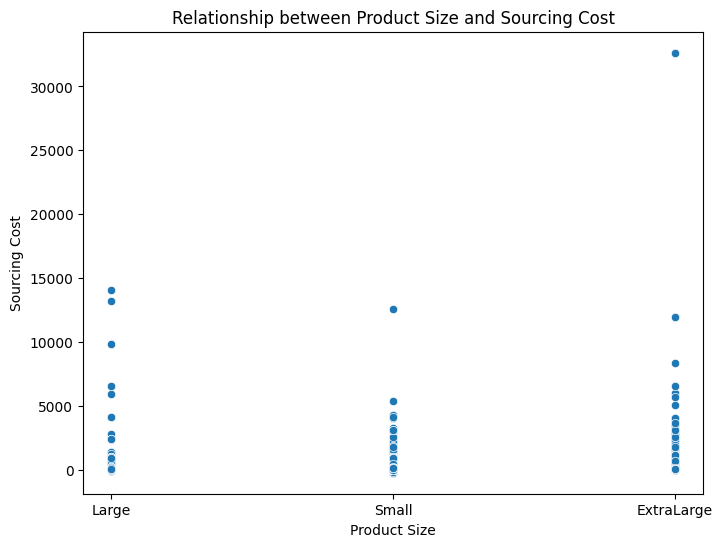

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Product Size', y='Sourcing Cost')
ax.set_title('Relationship between Product Size and Sourcing Cost')
plt.show()


* For the "Large" product size category, there is a cluster of data points with relatively low sourcing costs.
* The "Small" product size category has a wider range of sourcing costs, with data points spread across different cost levels.
* The "ExtraLarge" product size category tends to have higher sourcing costs, with most data points concentrated towards the upper end of the cost range.
* While there is some overlap in the sourcing costs across different product size categories, there appears to be a general trend where larger product sizes are associated with higher sourcing costs.

## Understanding Trend of Sourcing Cost over Time

/tmp/ipykernel_33/3825599521.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_costs = df_train.groupby(pd.Grouper(key='Month of Sourcing dt', freq='M'))['Sourcing Cost'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


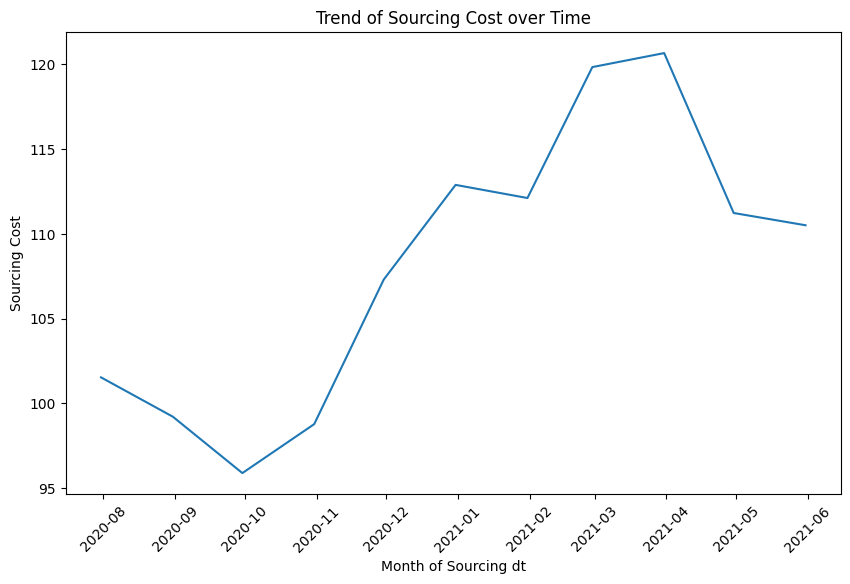

In [12]:
df_train['Month of Sourcing dt'] = pd.to_datetime(df_train['Month of Sourcing'], format='%b-%y')
monthly_costs = df_train.groupby(pd.Grouper(key='Month of Sourcing dt', freq='M'))['Sourcing Cost'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=monthly_costs, x='Month of Sourcing dt', y='Sourcing Cost')
ax.set_title('Trend of Sourcing Cost over Time')
plt.xticks(rotation=45)
plt.show()

df_train.drop("Month of Sourcing dt", axis=1, inplace=True)

* There are fluctuations in the sourcing cost over the time period shown.
* The sourcing cost starts at a relatively low level around 2020-09, followed by a gradual increase until it reaches a peak around 2022-02.
* After the peak, the sourcing cost experiences a decline, with a sharp drop occurring around 2022-09.
* The sourcing cost then stabilizes at a lower level towards the end of the time period shown (around 2023-06).

## Pie chart of Product type Distribution


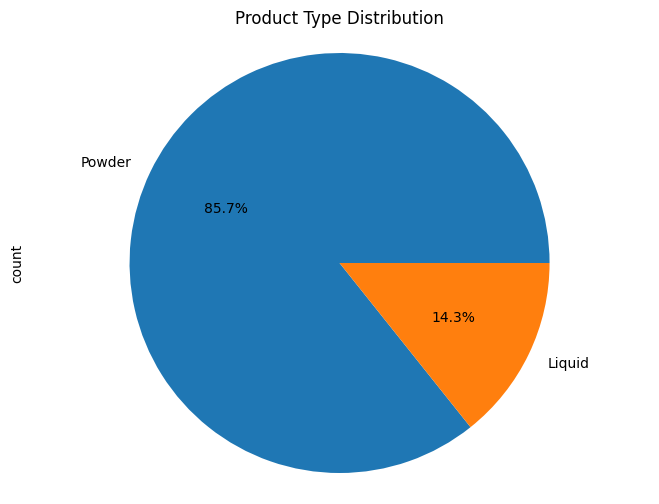

In [13]:
plt.figure(figsize=(8, 6))
df_train['Product Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product Type Distribution')
plt.axis('equal')
plt.show()

## Understanding Cost by Area Code

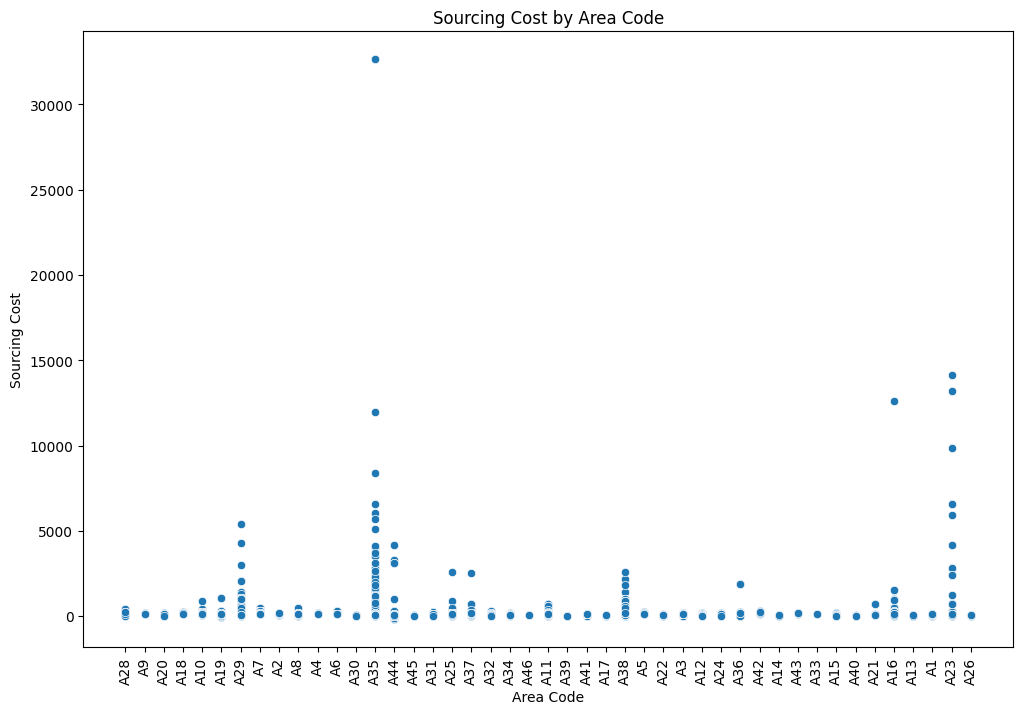

In [14]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_train, x='Area Code', y='Sourcing Cost')
plt.title('Sourcing Cost by Area Code')
plt.xticks(rotation=90)
plt.show()

The data points are scattered across different area codes, indicating varying sourcing costs for each area code. There appears to be a few area codes with relatively higher sourcing costs compared to the majority of the data points, which are clustered towards the lower end of the cost range.

## Displaying Number of Unique and distributions of Product Size

In [15]:
df_train["Product Size"].value_counts()

Product Size
Large         325566
Small         220462
ExtraLarge      4148
Name: count, dtype: int64

---
# Lets start with NMT1

In [16]:
df_train = pd.read_csv("/kaggle/input/assgt-dataset-company/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")
df_test = pd.read_csv("/kaggle/input/assgt-dataset-company/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

In [17]:
# Filter the training dataset for NTM1
df_train1 = df_train[df_train['ProductType'] == 'NTM1']

# Filter the test dataset for NTM1
df_test1 = df_test[df_test['ProductType'] == 'NTM1']

In [18]:
df_train1.shape

(194923, 8)

In [19]:
df_test1.shape

(35, 8)

In [20]:
# EDA GRAPH BELOW

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


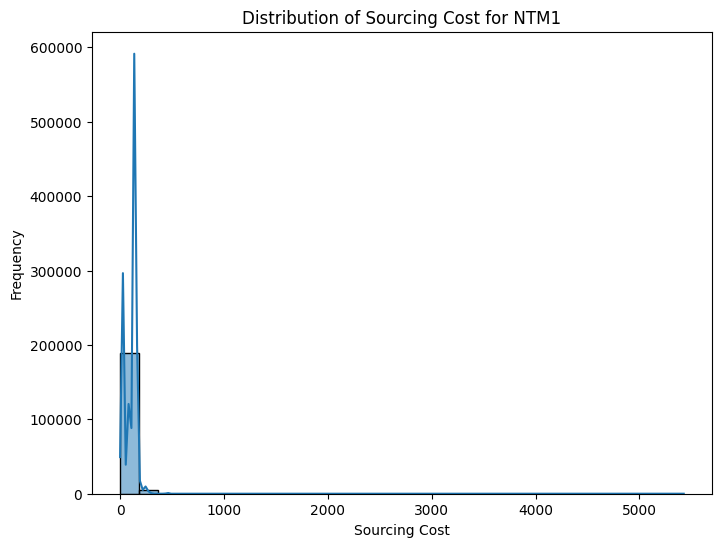

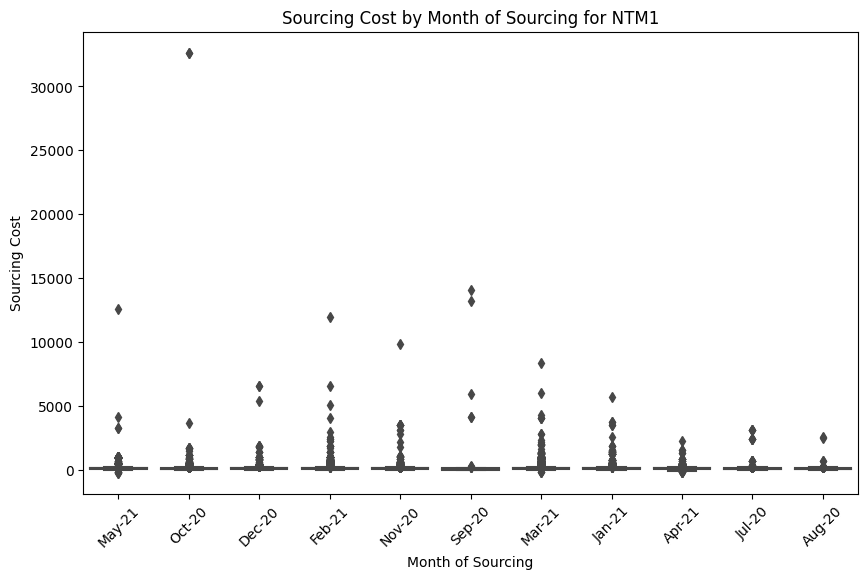

In [21]:
# Explore the distribution of the target variable (Sourcing Cost)
plt.figure(figsize=(8, 6))
sns.histplot(df_train1['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost for NTM1')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between variables (e.g., Sourcing Cost vs. Month of Sourcing)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month of Sourcing', y='Sourcing Cost', data=df_train)
plt.title('Sourcing Cost by Month of Sourcing for NTM1')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.show()


---
## Removing Outliers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


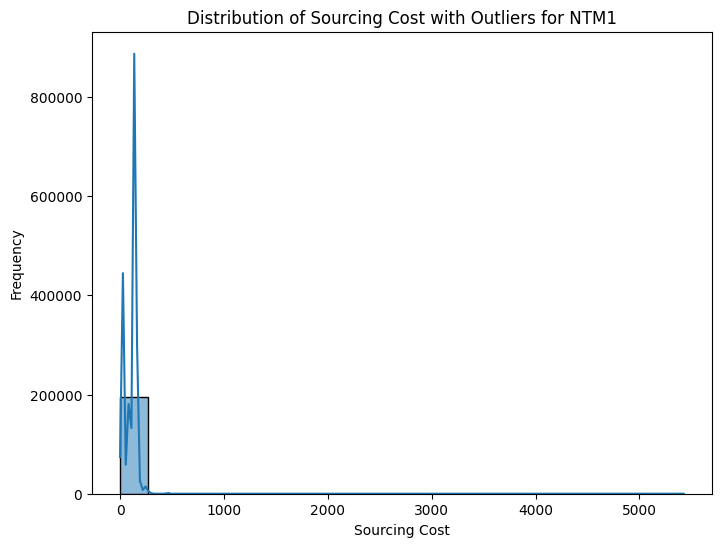

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train1['Sourcing Cost'], bins=20, kde=True)
plt.title('Distribution of Sourcing Cost with Outliers for NTM1')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()


The distribution of sourcing costs is right-skewed, meaning there are more facilities with lower sourcing costs.
There are a few outliers with significantly higher sourcing costs than the rest of the facilities.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


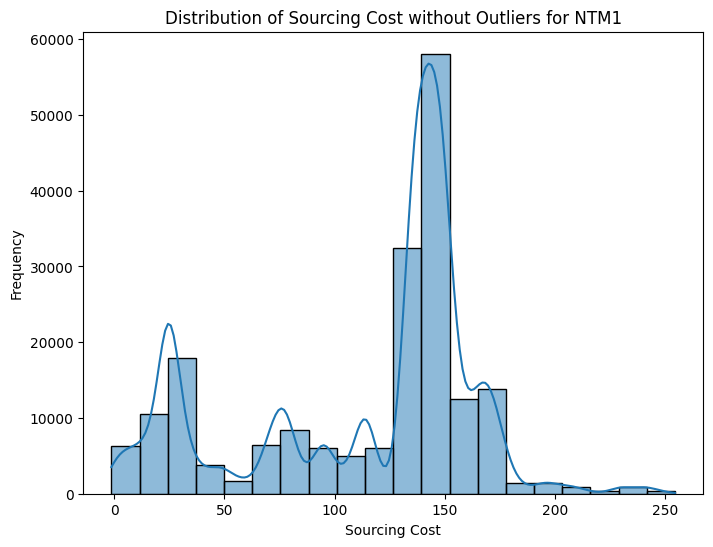

In [23]:
# Remove outliers from Sourcing Cost using IQR method
Q1 = df_train1['Sourcing Cost'].quantile(0.25)
Q3 = df_train1['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train1 = df_train1[(df_train1['Sourcing Cost'] >= lower_bound) & (df_train1['Sourcing Cost'] <= upper_bound)]

# Visualize the distribution of Sourcing Cost without outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_train1['Sourcing Cost'], bins=20, kde=True)
plt.title('Distribution of Sourcing Cost without Outliers for NTM1')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()


We see from above graph the outliers have been handled pretty well and now our model is ready to be trained!

In [24]:
# Check for missing values
print("Missing Values in NTM1 Training Dataset")
print(df_train1.isnull().sum())

Missing Values in NTM1 Training Dataset
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [25]:
df_train = df_train1
df_train1.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
5,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
11,NTM1,X1,A2,DIRECT,Large,Powder,Jan-21,173.44
16,NTM1,X1,A4,DIRECT,Large,Powder,Apr-21,143.92
18,NTM1,X1,A7,DIRECT,Large,Liquid,Feb-21,149.57
22,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,138.52


In [26]:
df_test1.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [27]:
df_train1.drop("ProductType", axis=1, inplace=True)
df_test1.drop("ProductType", axis=1, inplace=True)

/tmp/ipykernel_33/1069969645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.drop("ProductType", axis=1, inplace=True)


In [28]:
df_train1.head()

,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
5,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
11,X1,A2,DIRECT,Large,Powder,Jan-21,173.44
16,X1,A4,DIRECT,Large,Powder,Apr-21,143.92
18,X1,A7,DIRECT,Large,Liquid,Feb-21,149.57
22,X1,A10,DIRECT,Large,Powder,Sep-20,138.52


In [29]:
df_test1.head()

,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


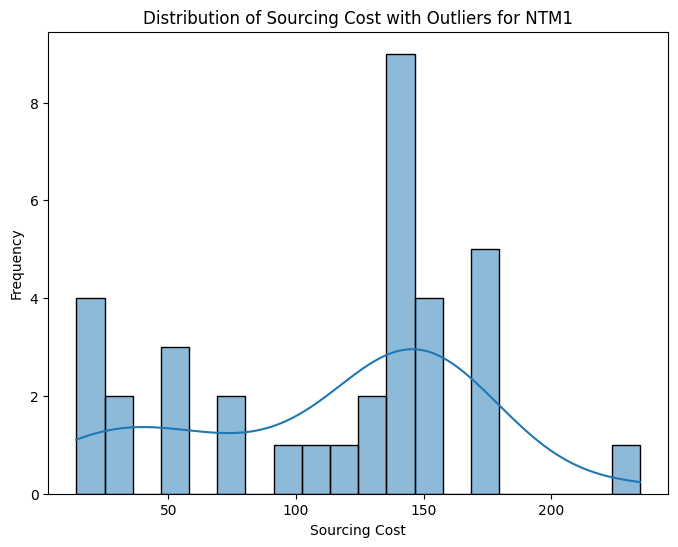

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df_test1['Sourcing Cost'], bins=20, kde=True)
plt.title('Distribution of Sourcing Cost with Outliers for NTM1')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()


since distribution of test has no outliers our testing will be done in a more valid format and will result in better conlucsion

---
# EDA WITH PRODUCT NTM1

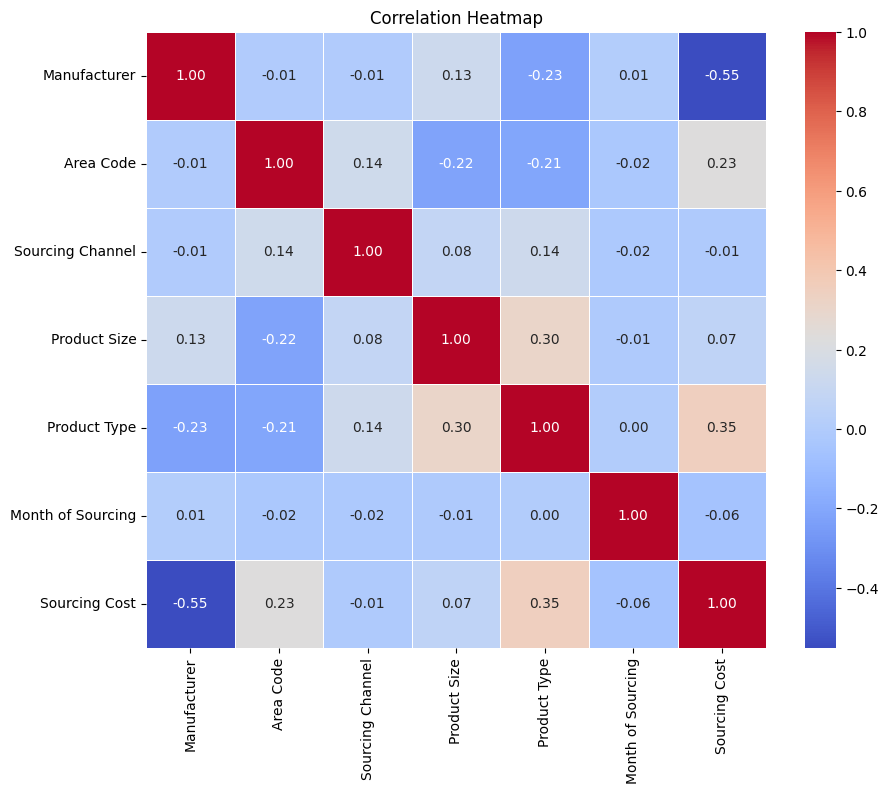

In [31]:
df_encoded = df_train1.copy()

label_encoder = LabelEncoder()

for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

plt.figure(figsize=(10, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [32]:
df_encoded

,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
5,0,1,0,0,1,10,137.93
11,0,4,0,0,1,4,173.44
16,0,14,0,0,1,0,143.92
18,0,22,0,0,0,3,149.57
22,0,1,0,0,1,10,138.52
...,...,...,...,...,...,...,...
550159,1,15,0,0,0,0,24.87
550161,0,2,0,0,1,4,142.91
550166,0,21,0,0,1,3,142.61
550167,1,15,0,0,0,4,24.87


---
# Training Model

In [33]:
X_train = df_train1.drop(columns=['Sourcing Cost'])
y_train = df_train1['Sourcing Cost']

X_test = df_test1.drop(columns=['Sourcing Cost'])
y_test = df_test1['Sourcing Cost']

label_encoder = LabelEncoder()
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

ValueError: y contains previously unseen labels: 'Jun-21'

# Expected Error Caught ✅

# As expected we got error because of Jun-21 being present in our data so lets modify our data a bit only for label encoder

In [34]:
df_train1.tail()

,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550159,X2,A40,DIRECT,Large,Liquid,Apr-21,24.87
550161,X1,A11,DIRECT,Large,Powder,Jan-21,142.91
550166,X1,A6,DIRECT,Large,Powder,Feb-21,142.61
550167,X2,A40,DIRECT,Large,Liquid,Jan-21,24.87
550175,X1,A3,DIRECT,Small,Powder,Nov-20,139.42


In [35]:
new_row1 = {
    'Manufacturer': 'X1',
    'Area Code': 'A3',
    'Sourcing Channel': 'DIRECT',
    'Product Size': 'Small',
    'Product Type': 'Powder',
    'Month of Sourcing': 'Jun-21',
    'Sourcing Cost': 200.0
}

new_row2 = {
    'Manufacturer': 'X1',
    'Area Code': 'A3',
    'Sourcing Channel': 'DIRECT',
    'Product Size': 'Small',
    'Product Type': 'Powder',
    'Month of Sourcing': 'July-21',
    'Sourcing Cost': 200.0
}

df_new_row1 = pd.DataFrame([new_row1])
df_new_row2 = pd.DataFrame([new_row2])

df_train1 = pd.concat([df_train1, df_new_row1, df_new_row2], ignore_index=True)

df_train1.tail()

,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
194177,X1,A6,DIRECT,Large,Powder,Feb-21,142.61
194178,X2,A40,DIRECT,Large,Liquid,Jan-21,24.87
194179,X1,A3,DIRECT,Small,Powder,Nov-20,139.42
194180,X1,A3,DIRECT,Small,Powder,Jun-21,200.00
194181,X1,A3,DIRECT,Small,Powder,July-21,200.00


In [71]:
X_train = df_train1.drop(columns=['Sourcing Cost'])
y_train = df_train1['Sourcing Cost']

X_test = df_test1.drop(columns=['Sourcing Cost'])
y_test = df_test1['Sourcing Cost']

label_encoder = LabelEncoder()
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])


X_train = X_train[:-2]
y_train = y_train[:-2]

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error for regression task
    n_estimators=1000,             # Number of boosting rounds (trees)
    max_depth=6,                   # Maximum depth of each tree
    learning_rate=0.1,             # Learning rate (step size shrinkage)
    subsample=0.8,                 # Subsample ratio of the training instance
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    random_state=42                # Random seed for reproducibility
)

model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Evaluate the model
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", test_rmse)


Test RMSE: 12.73195220222323


### Future Scope: Use grid search cv to optimise parameters

In [72]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("\nTest RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R-squared:", test_r2)


Training RMSE: 12.07220390353121
Training MAE: 5.340049763130855
Training R-squared: 0.9480805518983173

Test RMSE: 12.73195220222323
Test MAE: 9.674227617536273
Test R-squared: 0.9488718631649827


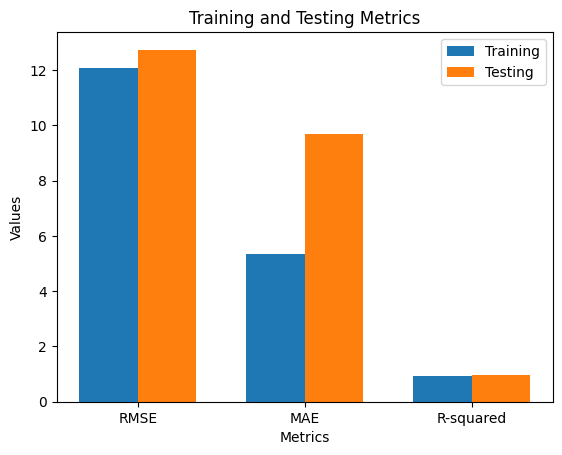

In [73]:
labels = ['RMSE', 'MAE', 'R-squared']

train_metrics = [train_rmse, train_mae, train_r2]

test_metrics = [test_rmse, test_mae, test_r2]

x = range(len(labels))
width = 0.35
fig, ax = plt.subplots()
train_rects = ax.bar(x, train_metrics, width, label='Training')
test_rects = ax.bar([i + width for i in x], test_metrics, width, label='Testing')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Training and Testing Metrics')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

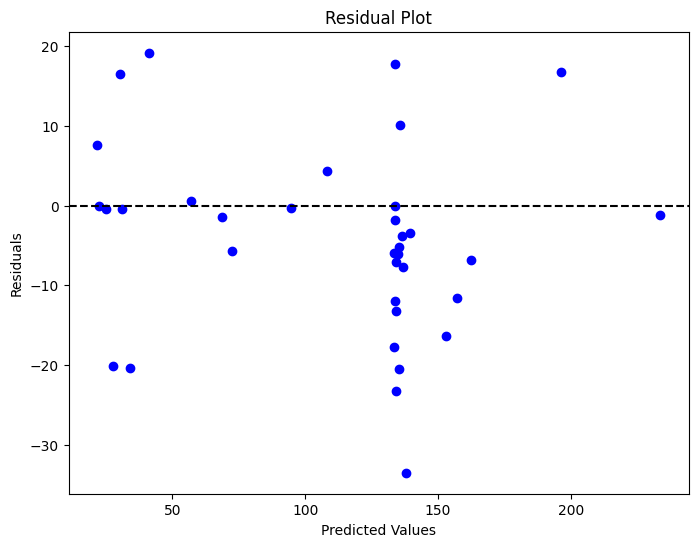

In [74]:

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, y_pred_test - y_test, color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


The residuals appear to be scattered randomly around the zero line, indicating that the overall model fit may be reasonable.
There is a slight pattern where the residuals seem to be more negative for lower predicted values and more positive for higher predicted values. This suggests that the model may be slightly under-predicting for lower values and over-predicting for higher values.
There are a few outliers or large residuals, both positive and negative, which could be influential points or potential outliers that may need further investigation.
The spread of the residuals appears to be relatively consistent across the range of predicted values, suggesting that the assumption of constant variance (homoscedasticity) may be met.

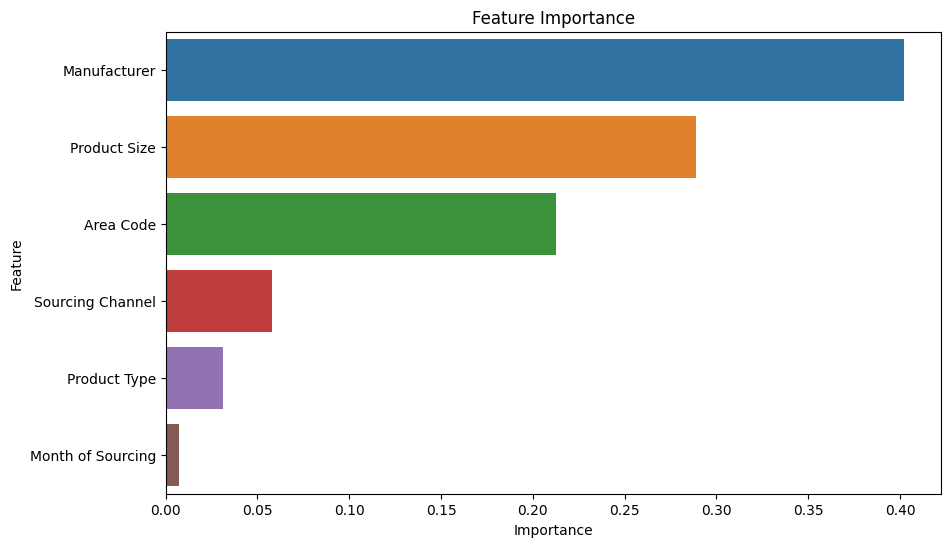

In [75]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# training neural networks

In [81]:
df_train1.tail()

,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
194177,X1,A6,DIRECT,Large,Powder,Feb-21,142.61
194178,X2,A40,DIRECT,Large,Liquid,Jan-21,24.87
194179,X1,A3,DIRECT,Small,Powder,Nov-20,139.42
194180,X1,A3,DIRECT,Small,Powder,Jun-21,200.00
194181,X1,A3,DIRECT,Small,Powder,July-21,200.00


In [82]:
X_train = df_train1.drop(columns=['Sourcing Cost'])
y_train = df_train1['Sourcing Cost']

X_test = df_test1.drop(columns=['Sourcing Cost'])
y_test = df_test1['Sourcing Cost']

label_encoder = LabelEncoder()
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

X_train = X_train[:-2] # removing last two rows
y_train = y_train[:-2]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4855/4855 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2560.4861 - val_loss: 612.5605
Epoch 2/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 615.4618 - val_loss: 487.6178
Epoch 3/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 448.9291 - val_loss: 358.7192
Epoch 4/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 321.0402 - val_loss: 250.0518
Epoch 5/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 252.5161 - val_loss: 237.2639
Epoch 6/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 229.3408 - val_loss: 239.3163
Epoch 7/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 209.5339 - val_loss: 210.0106
Epoch 8/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 213.2785 - val_loss: 198.8049
Epoch 9/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 207.9074 - val_loss: 195.5373
Epoch 10/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 205.0252 - val_loss: 189.2224
Epoch 11/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 207.5164 - val_loss: 189.1

In [86]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("\nTest RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R-squared:", test_r2)

6069/6069 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training RMSE: 13.522707298032135
Training MAE: 7.226314753243331
Training R-squared: 0.9348545274994247

Test RMSE: 13.190591961357509
Test MAE: 8.992377489362442
Test R-squared: 0.9451219665746076


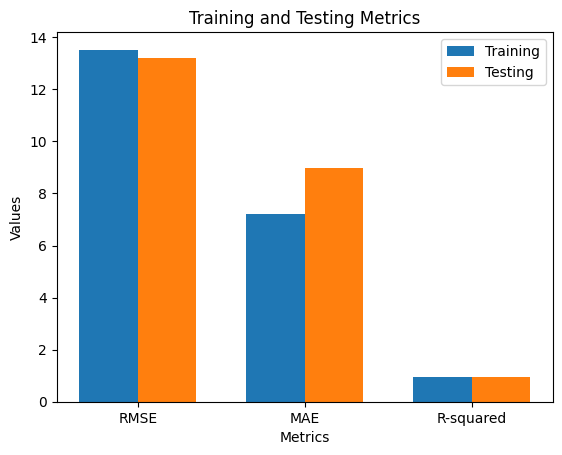

In [87]:
labels = ['RMSE', 'MAE', 'R-squared']
train_metrics = [train_rmse, train_mae, train_r2]
test_metrics = [test_rmse, test_mae, test_r2]
x = range(len(labels))
width = 0.35
fig, ax = plt.subplots()
train_rects = ax.bar(x, train_metrics, width, label='Training')
test_rects = ax.bar([i + width for i in x], test_metrics, width, label='Testing')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Training and Testing Metrics')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
plt.show()


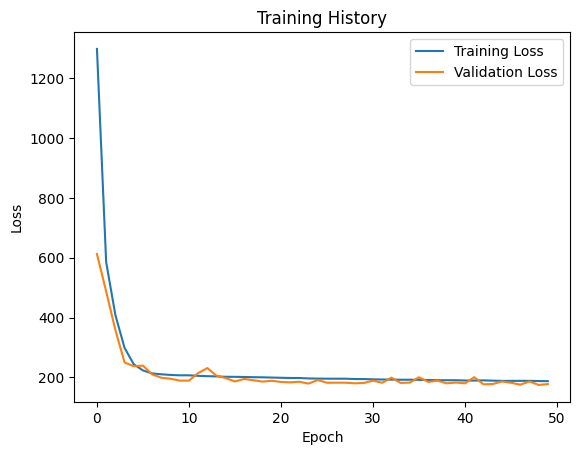

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()


# Using Complex Architecture

In [90]:
X_train = df_train1.drop(columns=['Sourcing Cost'])
y_train = df_train1['Sourcing Cost']

X_test = df_test1.drop(columns=['Sourcing Cost'])
y_test = df_test1['Sourcing Cost']

label_encoder = LabelEncoder()
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

    
X_train = X_train[:-2]
y_train = y_train[:-2]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4855/4855 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1565.2605 - val_loss: 203.6016
Epoch 2/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 264.7603 - val_loss: 203.2754
Epoch 3/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 231.1889 - val_loss: 197.4955
Epoch 4/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 219.5568 - val_loss: 202.1388
Epoch 5/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 208.2905 - val_loss: 167.8936
Epoch 6/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 193.1653 - val_loss: 181.9468
Epoch 7/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 187.2856 - val_loss: 170.2871
Epoch 8/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 177.5886 - val_loss: 164.0447
Epoch 9/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 176.2958 - val_loss: 167.3451
Epoch 10/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 172.9353 - val_loss: 239.1583
Epoch 11/50
4855/4855 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 189.4126 - val_

In [95]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("\nTest RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R-squared:", test_r2)

6069/6069 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training RMSE: 12.308467916502142
Training MAE: 5.958990777764362
Training R-squared: 0.9460284440197247

Test RMSE: 20.31304923517505
Test MAE: 11.172270302908759
Test R-squared: 0.8698571808697583


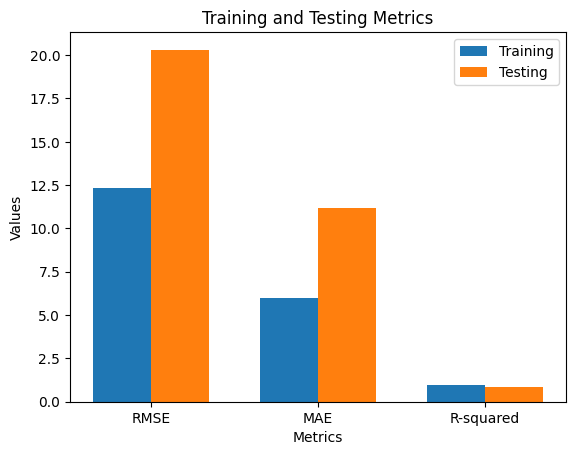

In [98]:
labels = ['RMSE', 'MAE', 'R-squared']
train_metrics = [train_rmse, train_mae, train_r2]
test_metrics = [test_rmse, test_mae, test_r2]
x = range(len(labels))
width = 0.35
fig, ax = plt.subplots()
train_rects = ax.bar(x, train_metrics, width, label='Training')
test_rects = ax.bar([i + width for i in x], test_metrics, width, label='Testing')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Training and Testing Metrics')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
plt.show()


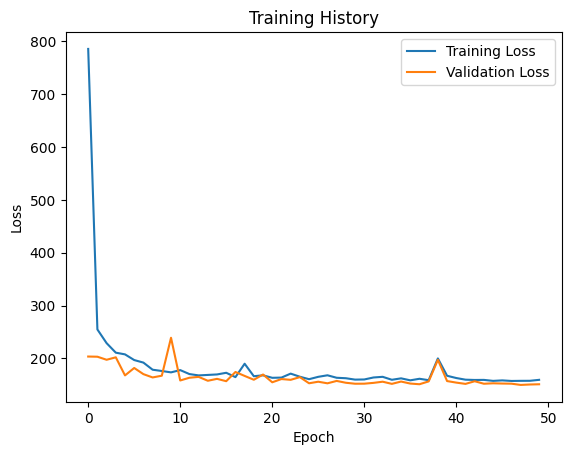

In [97]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()


### Conclusion:
Simple Architecture performs better and is approximately equivalent to that of XGBoost trained. Deeper architectures performs poor indicating understanding of data might not be as complex of a job for the neural entwork at the moment.

---
# arima 

In [100]:
!pip install pmdarima

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:0000:0100:01


In [101]:
auto_model = pm.auto_arima(df_train1['Sourcing Cost'], seasonal=False, trace=True)
best_params = auto_model.get_params()
print("Best Parameters:", best_params)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=59.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2429721.278, Time=1.94 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2208719.691, Time=2.25 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2328563.520, Time=10.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2164889.738, Time=2.76 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2145230.353, Time=3.57 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2134132.231, Time=4.80 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2126751.888, Time=5.77 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=135.56 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=115.39 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2092832.787, Time=22.50 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2092831.501, Time=17.87 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2092829.711, Time=15.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2092827.744, Time=11.83 sec
 ARIM

In [ ]:
auto_model = pm.auto_arima(df_train1['Sourcing Cost'], seasonal=True, m=12, trace=True)

best_params = auto_model.get_params()
print("Best Parameters:", best_params)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=808.50 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2092827.520, Time=3.57 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2092828.321, Time=100.33 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2092826.231, Time=49.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2429721.278, Time=1.88 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2092825.823, Time=13.08 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2092827.965, Time=54.48 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2092827.795, Time=542.30 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2092827.748, Time=9.94 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=2092827.776, Time=10.97 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2092825.747, Time=9.27 sec


### the RAM Crashed multiple times here (I can go ahead and remove variables that are taking space but due to time constraint im going ahead but by using 'del' and the variable name i can free RAM and restart this cell which fits as a great alternative solution) but based on the AIC values we get the following as the best parameters

*  ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2092825.747, Time=9.27 sec

In [38]:
# Fit the ARIMA model to the entire training data
order = (1, 0, 0)  # Non-seasonal parameters (p, d, q)
seasonal_order = (0, 0, 0, 12)  # Seasonal parameters (P, D, Q, S)
model = ARIMA(df_train1['Sourcing Cost'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          Sourcing Cost   No. Observations:               194182
Model:                 ARIMA(1, 0, 0)   Log Likelihood            -1046422.242
Date:                Sun, 12 May 2024   AIC                        2092850.484
Time:                        16:57:21   BIC                        2092881.014
Sample:                             0   HQIC                       2092859.481
                             - 194182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.4787      0.152    752.755      0.000     114.181     114.777
ar.L1          0.0044      0.002      1.955      0.051   -1.04e-05       0.009
sigma2      2807.0072     13.245    211.936      0.0

In [40]:
y_pred_train = model_fit.predict(start=df_train1.index[0], end=df_train1.index[-1])

train_rmse = np.sqrt(mean_squared_error(df_train1['Sourcing Cost'], y_pred_train))
train_mae = mean_absolute_error(df_train1['Sourcing Cost'], y_pred_train)
train_r2 = r2_score(df_train1['Sourcing Cost'], y_pred_train)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print('')

y_pred_test = model_fit.forecast(steps=len(df_test1))

# Calculate metrics for testing dataset
test_rmse = np.sqrt(mean_squared_error(df_test1['Sourcing Cost'], y_pred_test))
test_mae = mean_absolute_error(df_test1['Sourcing Cost'], y_pred_test)
test_r2 = r2_score(df_test1['Sourcing Cost'], y_pred_test)

print("Testing RMSE:", test_rmse)
print("Testing MAE:", test_mae)
print("Testing R-squared:", test_r2)


Training RMSE: 52.98108741234955
Training MAE: 44.55277154012841
Training R-squared: 1.958001485358185e-05

Testing RMSE: 56.312365148589365
Testing MAE: 48.1648210399411
Testing R-squared: -0.0001784764107128911


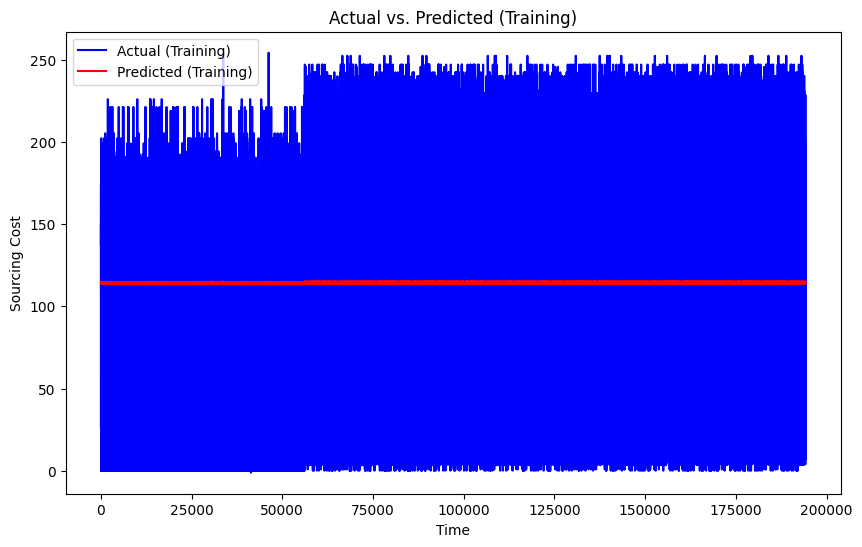

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df_train1.index, df_train1['Sourcing Cost'], label='Actual (Training)', color='blue')
plt.plot(df_train1.index, y_pred_train, label='Predicted (Training)', color='red')
plt.xlabel('Time')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs. Predicted (Training)')
plt.legend()
plt.show()


Overall we see ARIMA doesnt perform well based on RMSE , MAE AND R2 values 

In [42]:
# Define the SARIMA model parameters (p, d, q) and seasonal parameters (P, D, Q, S)
order = (1, 0, 0)  # Non-seasonal parameters (p, d, q)
seasonal_order = (0, 0, 0, 12)  # Seasonal parameters (P, D, Q, S)

model_sarima = SARIMAX(df_train1['Sourcing Cost'], order=order, seasonal_order=seasonal_order)
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68729D+00    |proj g|=  9.83125D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.831D-07   5.687D+00
  F =   5.6872884756352251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                               SARIMAX Results                                
Dep. Variable:          Sourcing Cost   No. Observations:               194182
Model:               SARIMAX(1, 0, 0)   Log Likelihood            -1104369.051
Date:                Sun, 12 May 2024   AIC                        2208742.102
Time:                        17:00:36   BIC                        2208762.455
Sample:                             0   HQIC                       2208748.100
                             - 194182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8244      0.002    514.246      0.000       0.821       0.828
sigma2      5098.4559     18.609    273.974      0.000    5061.982    5134.930
Ljung-Box (L1) (Q):               46353.56   Jarque-

In [44]:
y_pred_train_sarima = model_fit_sarima.predict(start=df_train1.index[0], end=df_train1.index[-1])

train_rmse_sarima = np.sqrt(mean_squared_error(df_train1['Sourcing Cost'], y_pred_train_sarima))
train_mae_sarima = mean_absolute_error(df_train1['Sourcing Cost'], y_pred_train_sarima)
train_r2_sarima = r2_score(df_train1['Sourcing Cost'], y_pred_train_sarima)

print("Training RMSE (SARIMA):", train_rmse_sarima)
print("Training MAE (SARIMA):", train_mae_sarima)
print("Training R-squared (SARIMA):", train_r2_sarima)
print('')

y_pred_test_sarima = model_fit_sarima.forecast(steps=len(df_test1))

test_rmse_sarima = np.sqrt(mean_squared_error(df_test1['Sourcing Cost'], y_pred_test_sarima))
test_mae_sarima = mean_absolute_error(df_test1['Sourcing Cost'], y_pred_test_sarima)
test_r2_sarima = r2_score(df_test1['Sourcing Cost'], y_pred_test_sarima)

print("Testing RMSE (SARIMA):", test_rmse_sarima)
print("Testing MAE (SARIMA):", test_mae_sarima)
print("Testing R-squared (SARIMA):", test_r2_sarima)


Training RMSE (SARIMA): 71.40397509238447
Training MAE (SARIMA): 57.19919215839612
Training R-squared (SARIMA): -0.8163290983617875

Testing RMSE (SARIMA): 107.65331678928254
Testing MAE (SARIMA): 90.82224505648513
Testing R-squared (SARIMA): -2.6553149076890974


Again we see SARIMA Doesnt perform well

## Conclusion:
### XGBoost ≈ Neural Netowrk w/ simple architecture > Neural Netowrk w/ deeper architecture > ARIMA(Fine tuning required) > SARIMA (Fine tuning required)

---
## Future Directions and Improvements
In my analysis of time series forecasting using models like ARIMA, SARIMA, neural networks, and XGBoost, I've identified several areas for future exploration and improvement.

1. Feature Engineering:
Explore Additional Features: Investigate the incorporation of external factors such as economic indicators, weather data, or seasonal trends into the forecasting models to capture more comprehensive patterns in the data.
Transformations and Aggregations: Experiment with different transformations or aggregations of existing features to uncover more nuanced relationships and improve the predictive performance of the models.
2. Model Selection:
Advanced Models: Consider the adoption of more sophisticated time series forecasting models such as Prophet, LSTM (Long Short-Term Memory), or GRU (Gated Recurrent Unit) to better capture nonlinear relationships and long-term dependencies in the data.
Ensemble Methods: Explore ensemble techniques like stacking or blending to combine the predictions of multiple models (e.g., SARIMA, neural networks, XGBoost) and leverage their complementary strengths for improved forecasting accuracy.
3. Hyperparameter Tuning:
Thorough Parameter Search: Conduct a comprehensive hyperparameter search for each model to identify the optimal settings, including learning rate, number of layers, regularization, and other model-specific parameters.
SARIMA Parameter Exploration: Experiment with different combinations of SARIMA parameters (p, d, q) and seasonal parameters (P, D, Q, S) to identify the most effective configuration for capturing the underlying patterns in the data.
4. Model Evaluation:
Advanced Evaluation Metrics: Utilize specialized evaluation metrics tailored to time series forecasting tasks, such as Mean Absolute Scaled Error (MASE) or Symmetric Mean Absolute Percentage Error (SMAPE), to obtain more comprehensive insights into model performance.
Cross-Validation: Implement cross-validation techniques to assess the generalization ability of the models across different time periods and ensure robust performance estimates.
5. Data Preprocessing:
Robust Data Preprocessing: Apply robust preprocessing techniques such as outlier detection, missing value imputation, and normalization or standardization to enhance the quality and consistency of the input data.
6. Ensemble Learning:
Model Combination: Explore ensemble learning approaches to combine the predictions of multiple models, mitigating individual weaknesses and producing more reliable forecasts.
Why ARIMA and SARIMA Performed Less Effectively:
Linear Assumptions: ARIMA and SARIMA models assume linear relationships between input and output variables, which may limit their ability to capture complex nonlinear patterns in the data.
Stationarity Assumption: These models require stationarity in the data, which may not always hold true in real-world datasets with trends, seasonality, or other nonlinear patterns.
Flexibility of Neural Networks and XGBoost: Neural networks and XGBoost are more flexible and adept at learning complex nonlinear relationships and patterns from data. They can automatically extract features and dependencies, making them better suited for tasks where underlying relationships are nonlinear or not well understood.
By exploring these future avenues and improvements, we can potentially enhance the predictive performance of our time series forecasting models and obtain more accurate and reliable forecasts.

---
By Najeeb Fairuddin Saiyed

najeeb.saiyed.btech2021@sitpune.edu.in

+91 8128026682